<a href="https://colab.research.google.com/github/dunkelweizen/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module2-sampling-confidence-intervals-and-hypothesis-testing/Cai_Nowicki_LS_DS_132_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel

In [0]:
from scipy.stats import chisquare

In [0]:
from scipy import stats

In [0]:

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'


df = pd.read_csv(url, header=None)
columns = ['Class Name', 'handicapped-infants', 
           'water-project-cost-sharing',
           'adoption-of-the-budget-resolution',
           'physician-fee-freeze',
           'el-salvador-aid',
           'religious-groups-in-schools',
           'anti-satellite-test-ban', 
           'aid-to-nicaraguan-contras',
           'mx-missile',
           'immigration',
           'synfuels-corporation-cutback',
           'education-spending',
           'superfund-right-to-sue',
           'crime',
           'duty-free-exports',
           'export-administration-act-south-africa']

df.columns = columns


In [5]:
df.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [0]:
df = df.replace(('?', 'y', 'n'), (np.NaN, 1, 0))


In [7]:
df.sample(5)

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
257,republican,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,1.0
160,democrat,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
323,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,NaN,1.0,0.0,0.0,1.0,1.0,0.0,NaN
344,democrat,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
161,democrat,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0


In [0]:
dem_mask = df['Class Name'] == 'democrat'
df_dems = df[dem_mask]
rep_mask = df['Class Name'] == 'republican'
df_reps = df[rep_mask]

In [0]:
df_dems = df_dems.fillna(df_dems.mean())
df_reps = df_reps.fillna(df_reps.mean())

In [0]:
def confidence_interval(data, confidence=0.95):
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = stats.sem(data)
  t = stats.t.ppf((1 + confidence) / 2.0, n-1)
  interval = stderr * t
  return (mean, mean-interval, mean+interval)

In [11]:
confidence_interval(df_dems['handicapped-infants'])

(0.6046511627906977, 0.5466302353923216, 0.6626720901890739)

So the mean for the 'handicapped-infants' column for Democrats is 0.605, with a 95% confidence interval of 0.547 to 0.663 (so the true mean is 95% likely to be between those numbers). I think this means that 60% of the Democrats voted 'yes', with 95% confidence that between 55% and 66% voted 'yes'.

In [12]:
confidence_interval(df_reps['handicapped-infants'])

(0.18787878787878787, 0.1287382657627541, 0.24701930999482163)

Republicans voted 'yes' 19% of the time, with a confidence interval between 13% and 25%. 

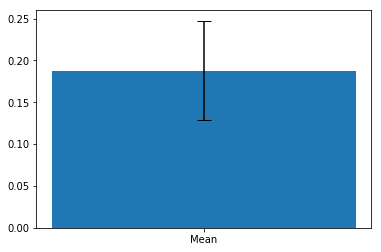

In [80]:
import matplotlib.pyplot as plt
yerr = (0.247-0.128) /2
plt.bar('Mean', df_reps['handicapped-infants'].mean(), width=0.3, yerr=yerr, capsize=7)
plt.show()

##Chi-squared test

In [14]:
import seaborn as sns

flights = sns.load_dataset('flights')

flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [15]:
flights.describe()

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


In [16]:
flights.describe(exclude='number')

,month
count,144
unique,12
top,December
freq,12


In [0]:
bins = [103,180,250,330,400,470,550, 1000]
bin_names = ['103-180', '181-250', '251-330', '331-400', '401-470', '471-550', '550+']

In [0]:
flights['passengers_categories'] = pd.cut(flights['passengers'], bins=bins, labels=bin_names)

In [29]:
flights['passengers_categories'].value_counts()

103-180    37
181-250    32
251-330    26
331-400    21
401-470    18
471-550     7
550+        3
Name: passengers_categories, dtype: int64

In [44]:
flights['year'].value_counts()

1960    12
1959    12
1958    12
1957    12
1956    12
1955    12
1954    12
1953    12
1952    12
1951    12
1950    12
1949    12
Name: year, dtype: int64

In [0]:
#!pip install pandas==0.23.4

In [60]:
flights = flights.sort_values(by='passengers_categories')

contingency_table = pd.crosstab(flights['passengers_categories'], flights['month'], margins=True)
contingency_table

month,January,February,March,April,May,June,July,August,September,October,November,December,All
passengers_categories,,,,,,,,,,,,,
103-180,4,4,3,3,3,3,2,2,2,3,5,3,37
181-250,3,3,3,3,3,2,2,2,3,3,2,3,32
251-330,2,3,2,2,2,2,2,2,2,2,3,2,26
331-400,2,2,2,3,2,1,1,1,1,2,2,2,21
401-470,1,0,2,1,1,2,2,2,3,2,0,2,18
471-550,0,0,0,0,1,2,2,1,1,0,0,0,7
550+,0,0,0,0,0,0,1,2,0,0,0,0,3
All,12,12,12,12,12,12,12,12,12,12,12,12,144


In [0]:
row_sums = contingency_table.iloc[0:7, 12].values
col_sums = contingency_table.iloc[7, 0:12].values

In [62]:
row_sums

array([37, 32, 26, 21, 18,  7,  3])

In [63]:
col_sums

array([12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12])

In [0]:
total = contingency_table.loc['All', 'All']

In [0]:
expected = []
for row_sum in row_sums:
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sum/total
    expected_row.append(expected_val)
  expected.append(expected_row)
  



In [66]:
  expected = np.array(expected)
  expected.shape

(7, 12)

In [67]:
expected

array([[3.08333333, 3.08333333, 3.08333333, 3.08333333, 3.08333333,
        3.08333333, 3.08333333, 3.08333333, 3.08333333, 3.08333333,
        3.08333333, 3.08333333],
       [2.66666667, 2.66666667, 2.66666667, 2.66666667, 2.66666667,
        2.66666667, 2.66666667, 2.66666667, 2.66666667, 2.66666667,
        2.66666667, 2.66666667],
       [2.16666667, 2.16666667, 2.16666667, 2.16666667, 2.16666667,
        2.16666667, 2.16666667, 2.16666667, 2.16666667, 2.16666667,
        2.16666667, 2.16666667],
       [1.75      , 1.75      , 1.75      , 1.75      , 1.75      ,
        1.75      , 1.75      , 1.75      , 1.75      , 1.75      ,
        1.75      , 1.75      ],
       [1.5       , 1.5       , 1.5       , 1.5       , 1.5       ,
        1.5       , 1.5       , 1.5       , 1.5       , 1.5       ,
        1.5       , 1.5       ],
       [0.58333333, 0.58333333, 0.58333333, 0.58333333, 0.58333333,
        0.58333333, 0.58333333, 0.58333333, 0.58333333, 0.58333333,
        0.58333333,

In [68]:
observed = pd.crosstab(flights['passengers_categories'], flights['month']).values
observed.shape

(7, 12)

In [69]:
observed

array([[4, 4, 3, 3, 3, 3, 2, 2, 2, 3, 5, 3],
       [3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 2, 3],
       [2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2],
       [2, 2, 2, 3, 2, 1, 1, 1, 1, 2, 2, 2],
       [1, 0, 2, 1, 1, 2, 2, 2, 3, 2, 0, 2],
       [0, 0, 0, 0, 1, 2, 2, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0]])

In [0]:
chi_square = ((observed - expected)**2/(expected)).sum()

In [71]:
chi_square

41.946836946836946

Degrees of freedom = rows - 1 * columns - 1

6 * 11 = 66 degrees of freedom

This results does not have a p-value <0.05, so I fail to reject the null - there is no dependency between month and number of passengers

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)